<a href="https://colab.research.google.com/github/nadh1981/aliextract/blob/master/udemy-practice/python-algo-trading-a-z/financial-data-analysis/practice/SMA_Crossover_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#udemy-practice/python-algo-trading-a-z/financial-data-analysis/practice/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [50]:
data = pd.read_csv("https://raw.githubusercontent.com/nadh1981/colabnotes/main/udemy-practice/python-algo-trading-a-z/financial-data-analysis/Part3_Materials/eurusd.csv?token=AAHIWAEOVF7ZJKHR2GOG3H3BAM26E", parse_dates=["Date"], index_col="Date")

In [51]:
data.head(5)

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [52]:
sma_s = 50
sma_l = 200

In [53]:
data["SMA_S"] = data.price.rolling(sma_s).mean()
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [54]:
data.head()

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN


In [55]:
data.dropna(inplace=True)
data.head()

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643


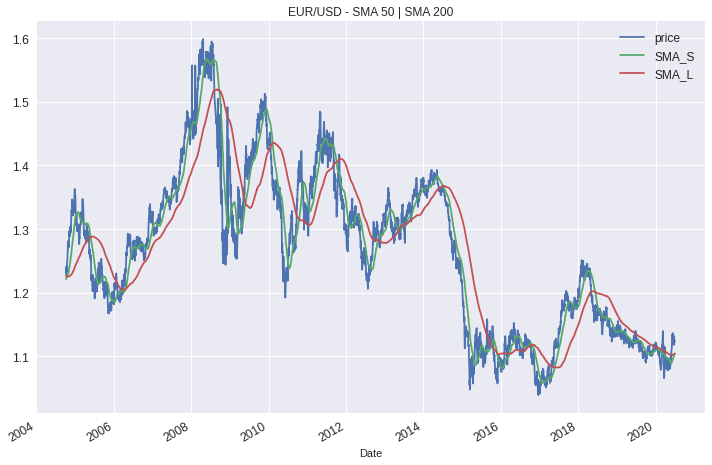

In [56]:
data.plot(figsize = (12,8), title="EUR/USD - SMA {} | SMA {}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

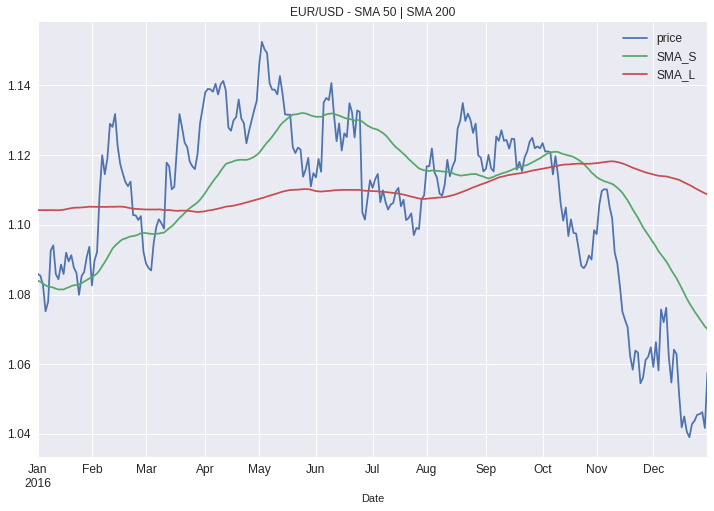

In [57]:
data.loc["2016"].plot(figsize = (12,8), title="EUR/USD - SMA {} | SMA {}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [58]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)

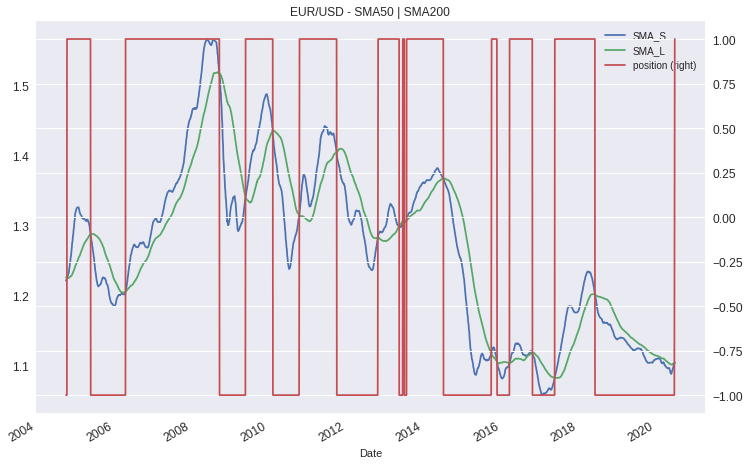

In [59]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12,8), fontsize = 12, secondary_y="position", title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

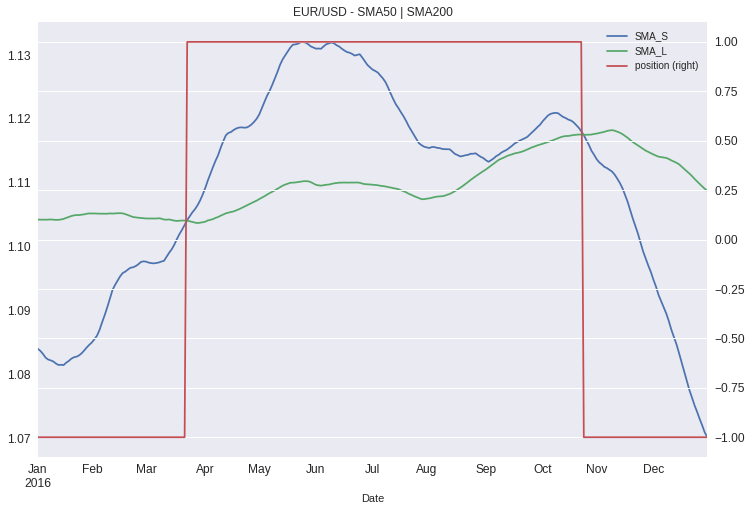

In [60]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12,8), fontsize = 12, secondary_y="position", title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [61]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))
data.head()

,price,SMA_S,SMA_L,position,returns
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102


In [62]:
data["strategy"] = data.position.shift(1) * data["returns"]
data.head(20)

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270
2004-10-14,1.238896,1.225140,1.225304,-1,0.003228,-0.003228
2004-10-15,1.247894,1.225482,1.225114,1,0.007236,-0.007236
2004-10-18,1.248907,1.225915,1.224988,1,0.000811,0.000811


In [63]:
data[["returns", "strategy"]].sum() #absolute performance

returns    -0.087929
strategy    0.249591
dtype: float64

In [64]:
data[["returns", "strategy"]].sum().apply(np.exp) #absolute performance

returns     0.915826
strategy    1.283500
dtype: float64

In [65]:
data[["returns", "strategy"]].mean() * 252 #annualized return

returns    -0.005438
strategy    0.015435
dtype: float64

In [66]:
data[["returns", "strategy"]].std() * np.sqrt(252) #annualized risk

returns     0.120806
strategy    0.120802
dtype: float64

In [67]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [68]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


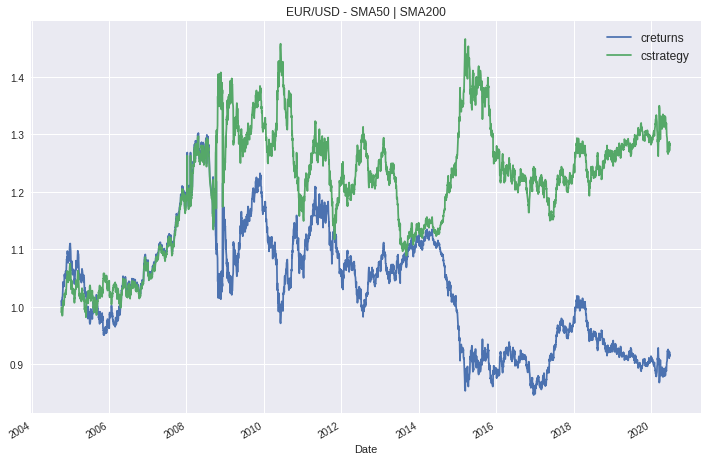

In [69]:
data[["creturns", "cstrategy"]].plot(figsize=(12,8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [70]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.3676743925451291